**App Review Sentiment Analysis**

App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community.

Importing Python libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [5]:
# Load the dataset
linkedin = pd.read_csv("/content/drive/MyDrive/linkedin-reviews.csv")

# Display the first few rows of the dataset
print(linkedin.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


This dataset is about the user's review about LinkedIn and it contains two columns: Review and Rating.

The Review column consists of textual reviews and Rating column consists of numerical rating for respective reviews.

In [6]:
print(linkedin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


Data Analysis

<ipython-input-9-d6274d0f5c2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=linkedin, x='Rating', palette='viridis')


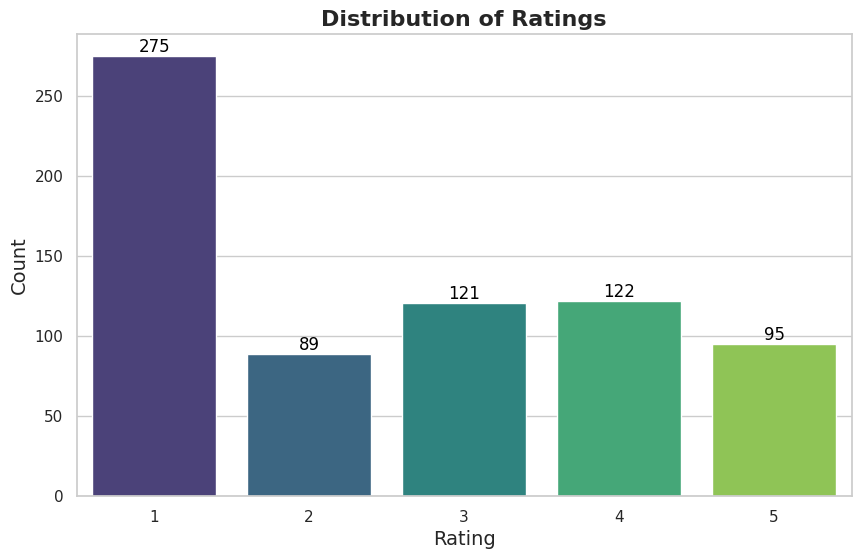

In [9]:
# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot with a vibrant color palette
sns.countplot(data=linkedin, x='Rating', palette='viridis')

# Add a title and labels with enhanced font sizes
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", fontsize=12, color='black')

# Show the plot
plt.show()


The above graph gives a clear picture of how many reviews fall into each category ( from 1 to 5)

Distribution of Review Lengths

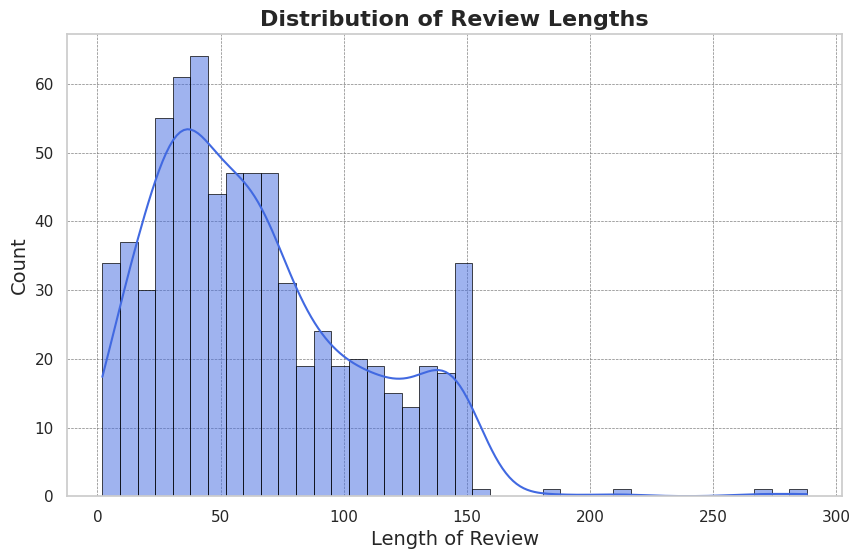

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the length of each review
linkedin['Review Length'] = linkedin['Review'].apply(len)

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot histogram with a color palette and KDE
sns.histplot(linkedin['Review Length'], bins=40, kde=True, color="royalblue", edgecolor="black", linewidth=0.5)

# Adding labels and title with enhanced font size and weight
plt.title('Distribution of Review Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Length of Review', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add grid and adjust plot aesthetics
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


Adding sentiment Labels in the data

For this stage, we will be using **Textblob**, as it gives a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative.

In [14]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin['Sentiment'] = linkedin['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(linkedin.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.

Analyzing App Reviews Sentiments

Now that our dataset is labelled, let’s perform app reviews sentiment analysis. We’ll begin by analyzing the distribution of sentiments across the dataset.

<ipython-input-18-e3b500175979>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='pastel')


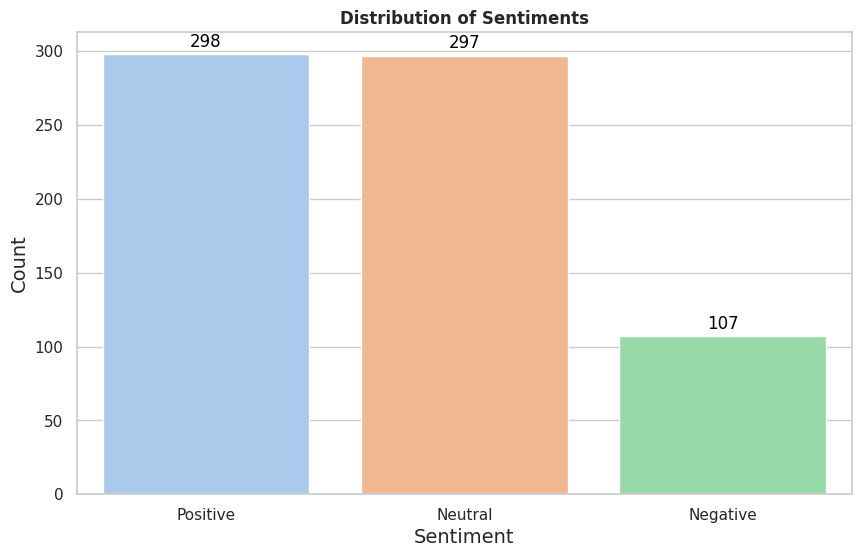

In [18]:
# Analyzing the distribution of sentiments
sentiment_distribution = linkedin['Sentiment'].value_counts()

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot sentiment distribution with a colorful palette
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='pastel')

# Adding labels and title with enhanced font size and weight
plt.title('Distribution of Sentiments', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display count labels on each bar
for i, value in enumerate(sentiment_distribution.values):
    plt.text(i, value + 5, f'{value}', ha='center', fontsize=12, color='black')

# Show the plot
plt.show()

So, we can see although the app has low ratings, still the reviewers don’t use many negative words in the reviews for the app.

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating.

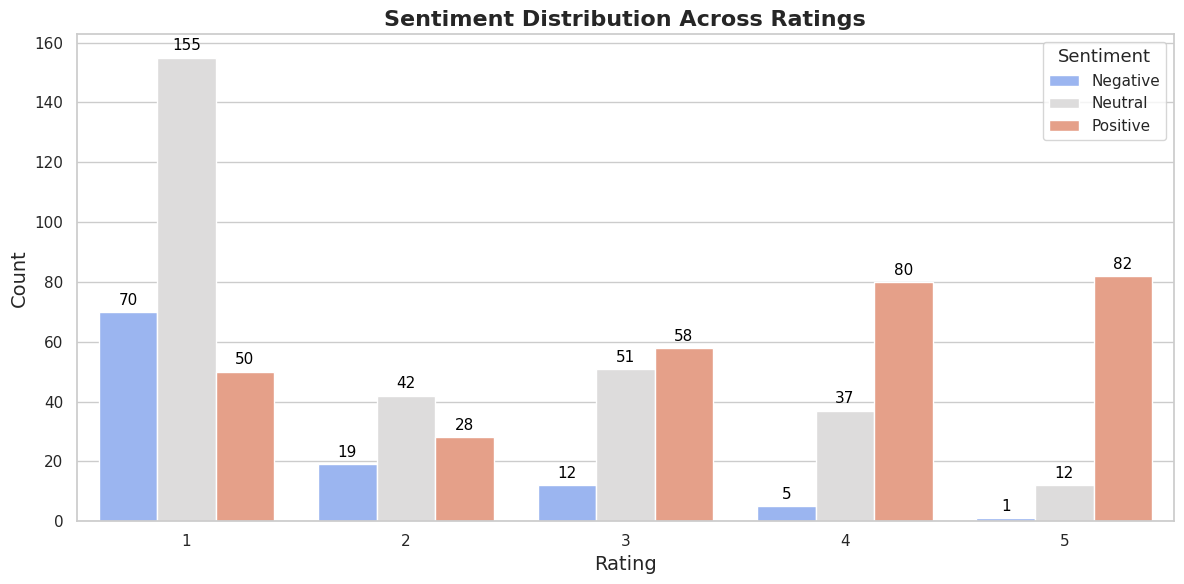

In [20]:
# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot sentiment distribution across ratings with a vibrant color palette
sns.countplot(data=linkedin, x='Rating', hue='Sentiment', palette='coolwarm')

# Adding labels and title with enhanced font size and weight
plt.title('Sentiment Distribution Across Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sentiment', title_fontsize='13', fontsize='11', loc='upper right')

# Add count labels on top of each bar for clarity
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", fontsize=11, padding=3, color='black')

# Adjust spacing for a clean look and display the plot
plt.tight_layout()
plt.show()

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

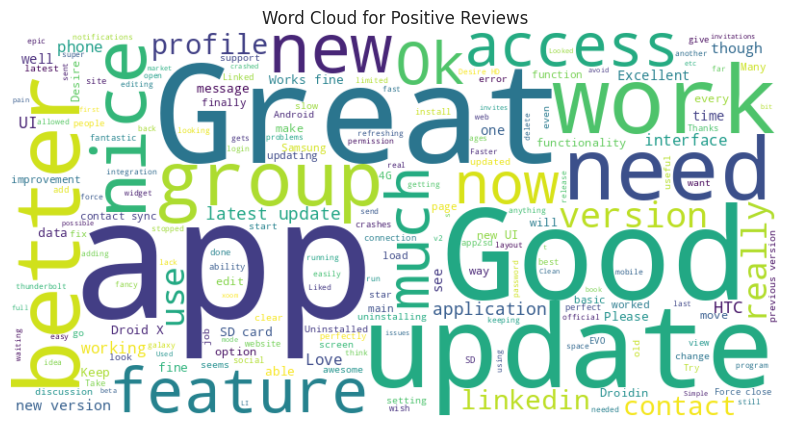

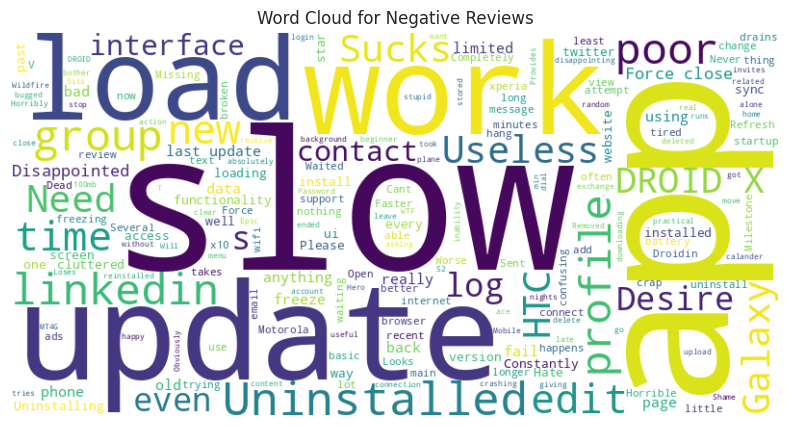

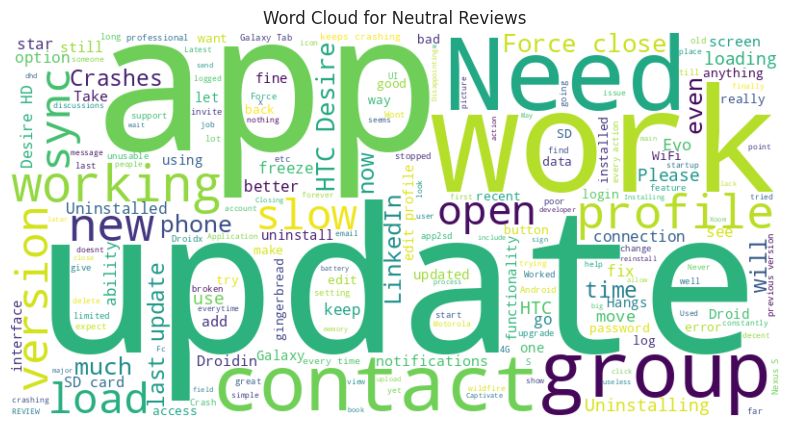

In [22]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin[linkedin['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)